# 텍스트 데이터 다루기
## 문자열 데이터 타입
* 문자열 데이터 종류
    * 범주형 데이터
       * 고정된 목록으로 구성
       * 데이터셋에서 고유한 값을 찾아, 이 값들이 얼마나 자주 나타나는지 히스토그램을 그려볼 수 있다.
    * 범주에 의미를 연결시킬 수 있는 임의의 문자열
        * 범주형 변수로 인코딩하려면 가장 보편적인 값을 선택하든지, 애플리케이션에 맞게 이런 응답을 포용할 수 있는 범주를 정의하는 게 최선.
    * 구조화된 문자열 데이터
        * 주소나 장소, 사람 이름, 날짜, 전화번호, 식별번호저럼 일정한 구조를 가지기도 한다.
    * 텍스트 데이터
        * 자유도운 형태의 절과 문장으로 구성된 텍스트 데이터.
        * 말뭉치(corpus): 데이터셋
        * 문서(document): 하나의 텍스트를 의미하는 각 데이터 포인트

## 예제 애플리케이션: 영화 리뷰 감성 분석

In [1]:
!wget -nc http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz -P data
!tar xzf data/aclImdb_v1.tar.gz --skip-old-files -C data

'wget' is not recognized as an internal or external command,
operable program or batch file.
tar: Option --skip-old-files is not supported
Usage:
  List:    tar -tf <archive-filename>
  Extract: tar -xf <archive-filename>
  Create:  tar -cf <archive-filename> [filenames...]
  Help:    tar --help


In [4]:
!tree data/aclImdb

Folder PATH listing for volume HDD
Volume serial number is 00000006 E03D:6DD2
D:\DEV\AI-LECTURE\INTRODUCTION_TO_MACHINE_LEARNING_WITH_PYTHON\DATA\ACLIMDB
����test
�   ����neg
�   ����pos
����train
    ����neg
    ����pos


* 하위 폴더가 레이블로 구분된 폴더 구조라면 scikit-learn의 load_files 함수를 사용해서 파일을 읽을 수 있다.

In [5]:
from sklearn.datasets import load_files

reviews_train = load_files('data/aclImdb/train/')

text_train, y_train = reviews_train.data, reviews_train.target
print('text_train type:', type(text_train))
print('text_train length:', len(text_train))
print(f'text_train[6]:\n{text_train[6]}')

text_train type: <class 'list'>
text_train length: 25000
text_train[6]:
b"This movie has a special way of telling the story, at first i found it rather odd as it jumped through time and I had no idea whats happening.<br /><br />Anyway the story line was although simple, but still very real and touching. You met someone the first time, you fell in love completely, but broke up at last and promoted a deadly agony. Who hasn't go through this? but we will never forget this kind of pain in our life. <br /><br />I would say i am rather touched as two actor has shown great performance in showing the love between the characters. I just wish that the story could be a happy ending."


In [6]:
text_train = [doc.replace(b'<br />', b' ') for doc in text_train]

In [7]:
import numpy as np

print('class sample numbers (train data):', np.bincount(y_train))

class sample numbers (train data): [12500 12500]


In [8]:
reviews_test = load_files('data/aclImdb/test/')
text_test, y_test = reviews_test.data, reviews_test.target
print('test data document number:', len(text_test))
print('class sample numbers (test data):', np.bincount(y_test))
text_test = [doc.replace(b'<br />', b' ') for doc in text_test]

test data document number: 25000
class sample numbers (test data): [12500 12500]


## 텍스트 데이터를 BOW로 표현하기
* BOW(bag of words)는 가장 간단하지만 효과적이면서 널리 쓰이는 방법.
* 구조와 상관없이 단어의 출현 횟수만 센다.
* BOW 표현 계산
    1. 토큰화(tokenization): 각 문셔랄 문서에 포함된 단어(토큰)로 나눈다. (공백, 구두점 등..)
    2. 어휘 사전 구축: 모든 문서에 나타난 모든 단어의 어휘를 모으고 번호를 매긴다. (알파벳 순서)
    3. 인코딩: 어휘 사전의 단어가 문서마다 몇 번이나 나타나는지를 헤아린다.

### 샘플 데이터에 BOW 적용하기

In [9]:
bards_words = ['The fool doth think he is wise,', 'but the wise man knows himself to be a fool']

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(bards_words)

CountVectorizer()

In [13]:
print('vocabulary size:', len(vect.vocabulary_))
print(f'vocabulary contents:\n{vect.vocabulary_}')

vocabulary size: 13
vocabulary contents:
{'the': 9, 'fool': 3, 'doth': 2, 'think': 10, 'he': 4, 'is': 6, 'wise': 12, 'but': 1, 'man': 8, 'knows': 7, 'himself': 5, 'to': 11, 'be': 0}


In [14]:
bag_of_words = vect.transform(bards_words)
print('BOW:', repr(bag_of_words))

BOW: <2x13 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>


In [15]:
print(f'BOW array:\n{bag_of_words.toarray()}')

BOW array:
[[0 0 1 1 1 0 1 0 0 1 1 0 1]
 [1 1 0 1 0 1 0 1 1 1 0 1 1]]


### 영화 리뷰에 대한 BOW

In [16]:
vect = CountVectorizer().fit(text_train)
X_train = vect.transform(text_train)
print(f'X_train:\n{repr(X_train)}')

X_train:
<25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3431196 stored elements in Compressed Sparse Row format>


In [17]:
feature_names = vect.get_feature_names()
print(f'feature number: {len(feature_names)}')
print(f'head 20 features:\n{feature_names[:20]}')
print(f'20010 ~ 20030 features:\n{feature_names[20010:20030]}')
print(f'per 2000 features:\n{feature_names[::2000]}')

feature number: 74849
head 20 features:
['00', '000', '0000000000001', '00001', '00015', '000s', '001', '003830', '006', '007', '0079', '0080', '0083', '0093638', '00am', '00pm', '00s', '01', '01pm', '02']
20010 ~ 20030 features:
['dratted', 'draub', 'draught', 'draughts', 'draughtswoman', 'draw', 'drawback', 'drawbacks', 'drawer', 'drawers', 'drawing', 'drawings', 'drawl', 'drawled', 'drawling', 'drawn', 'draws', 'draza', 'dre', 'drea']
per 2000 features:
['00', 'aesir', 'aquarian', 'barking', 'blustering', 'bête', 'chicanery', 'condensing', 'cunning', 'detox', 'draper', 'enshrined', 'favorit', 'freezer', 'goldman', 'hasan', 'huitieme', 'intelligible', 'kantrowitz', 'lawful', 'maars', 'megalunged', 'mostey', 'norrland', 'padilla', 'pincher', 'promisingly', 'receptionist', 'rivals', 'schnaas', 'shunning', 'sparse', 'subset', 'temptations', 'treatises', 'unproven', 'walkman', 'xylophonist']


In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

scores = cross_val_score(LogisticRegression(max_iter=1000), X_train, y_train, n_jobs=-1)
print(f'cross validation score: {np.mean(scores):.3f}')

cross validation score: 0.881


In [22]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(max_iter=5000), param_grid, n_jobs=-1)
grid.fit(X_train, y_train)
print(f'best cross validation score: {grid.best_score_:.3f}')
print('best parameters:', grid.best_params_)

best cross validation score: 0.888
best parameters: {'C': 0.1}


In [23]:
X_test = vect.transform(text_test)
print(f'test score: {grid.score(X_test, y_test):.3f}')

test score: 0.879


* CountVectorizer는 정규표현식을 사용해 토큰을 추출.
* "\b\w\w+\b" 기본으로 사용.
* 모든 단어 소문자로 변경.

In [25]:
vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
print('min_df X_train:', repr(X_train))

min_df X_train: <25000x27271 sparse matrix of type '<class 'numpy.int64'>'
	with 3354014 stored elements in Compressed Sparse Row format>


In [27]:
feature_names = vect.get_feature_names()

print(f'head 50 features:\n{feature_names[:50]}')
print(f'20,010~20,030 features:\n{feature_names[20010:20030]}')
print(f'per 700 features:\n{feature_names[::700]}')

head 50 features:
['00', '000', '007', '00s', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '100', '1000', '100th', '101', '102', '103', '104', '105', '107', '108', '10s', '10th', '11', '110', '112', '116', '117', '11th', '12', '120', '12th', '13', '135', '13th', '14', '140', '14th', '15', '150', '15th', '16', '160', '1600', '16mm', '16s', '16th']
20,010~20,030 features:
['repentance', 'repercussions', 'repertoire', 'repetition', 'repetitions', 'repetitious', 'repetitive', 'rephrase', 'replace', 'replaced', 'replacement', 'replaces', 'replacing', 'replay', 'replayable', 'replayed', 'replaying', 'replays', 'replete', 'replica']
per 700 features:
['00', 'affections', 'appropriately', 'barbra', 'blurbs', 'butchered', 'cheese', 'commitment', 'courts', 'deconstructed', 'disgraceful', 'dvds', 'eschews', 'fell', 'freezer', 'goriest', 'hauser', 'hungary', 'insinuate', 'juggle', 'leering', 'maelstrom', 'messiah', 'music', 'occasional', 'parking', 'pleasantville', 'pronunciation', 

In [28]:
grid = GridSearchCV(LogisticRegression(max_iter=5000), param_grid, n_jobs=-1)
grid.fit(X_train, y_train)
print(f'best cross validation score: {grid.best_score_:.3f}')

best cross validation score: 0.888


## 불용어
* 의미 없는 단어를 제거하는 또 다른 방법은 너무 빈번하여 유용하지 않은 단어를 제외하는 것.
    * 언어별 불용어(stopword) 목록을 사용
    * 너무 자주 나타나는 단어를 제외

In [33]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print(f'stopword numbers:', len(ENGLISH_STOP_WORDS))
print(f'per 10 stopwords:\n{list(ENGLISH_STOP_WORDS)[::10]}')

stopword numbers: 318
per 10 stopwords:
['becoming', 'of', 'everything', 'cant', 'themselves', 'other', 'bill', 'have', 'had', 'co', 'in', 'do', 'these', 'once', 'wherever', 'until', 'last', 'few', 'yourself', 'should', 'but', 'anywhere', 'each', 'yourselves', 'latterly', 'detail', 'front', 'eleven', 'de', 'down', 'whence', 'her']


In [34]:
vect = CountVectorizer(min_df=5, stop_words='english').fit(text_train)
X_train = vect.transform(text_train)
print(f'removed stopwords X_train:\n{repr(X_train)}')

removed stopwords X_train:
<25000x26966 sparse matrix of type '<class 'numpy.int64'>'
	with 2149958 stored elements in Compressed Sparse Row format>


In [35]:
grid = GridSearchCV(LogisticRegression(max_iter=5000), param_grid, n_jobs=-1)
grid.fit(X_train, y_train)
print(f'best cross validation score: {grid.best_score_:.3f}')

best cross validation score: 0.883


## tf-idf 로 데이터 스케일 변경하기
* 덜마나 의미 있는 특성인지를 계산해서 스케일을 조정하는 방식이 있다.
* tf-dif(term frequency-inverse document frequency, 단어빈도-뎍문서빈도)
    * 말뭉치의 다른 문서보다 특정 문서에 자주 나타나는 단어에 높은 가중치를 주는 방법.
    * 문서 d에 있는 단어 w에 대한 tf-idf 점수
    * $tfidf(w, d) = tf(log(\frac{N + 1}{N_w + 1}) + 1)$
    * N: 순련 세트에 있는 문서의 개수
    * $N_w$: 단어 w가 나타난 순련 세트 문서의 개수
    * $tf$(단어 빈도수): 단어 w가 대상 문서 d(변환 또는 인코딩하려는 문서)에 나타난 횟수
    * tf-idf 계산을 한 후에 L2 정규화(L2 normalization) 적용
    * 유클리디안 노름(euclidean norm)이 1이 되도록 각 문서 벡터의 스케일을 바꾼다.
    * => 문서의 길이(단어의 수)에 영향을 받지 않는다.

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression(max_iter=5000))
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(pipe, param_grid, n_jobs=-1)
grid.fit(text_train, y_train)
print(f'best score: {grid.best_score_:.3f}')

best score: 0.892


In [38]:
vectorizer = grid.best_estimator_.named_steps['tfidfvectorizer']
X_train = vectorizer.transform(text_train)
max_value = X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
feature_names = np.array(vectorizer.get_feature_names())
print(f'min tfidf feature:\n{feature_names[sorted_by_tfidf[:20]]}')
print(f'max tfidf feature:\n{feature_names[sorted_by_tfidf[-20:]]}')

min tfidf feature:
['suplexes' 'gauche' 'hypocrites' 'oncoming' 'songwriting' 'galadriel'
 'emerald' 'mclaughlin' 'sylvain' 'oversee' 'cataclysmic' 'pressuring'
 'uphold' 'thieving' 'inconsiderate' 'ware' 'denim' 'reverting' 'booed'
 'spacious']
max tfidf feature:
['gadget' 'sucks' 'zatoichi' 'demons' 'lennon' 'bye' 'dev' 'weller'
 'sasquatch' 'botched' 'xica' 'darkman' 'woo' 'casper' 'doodlebops'
 'smallville' 'wei' 'scanners' 'steve' 'pokemon']


In [39]:
sorted_by_idf = np.argsort(vectorizer.idf_)
print(f'lowest idf feature:\n{feature_names[sorted_by_idf[:100]]}')

lowest idf feature:
['the' 'and' 'of' 'to' 'this' 'is' 'it' 'in' 'that' 'but' 'for' 'with'
 'was' 'as' 'on' 'movie' 'not' 'have' 'one' 'be' 'film' 'are' 'you' 'all'
 'at' 'an' 'by' 'so' 'from' 'like' 'who' 'they' 'there' 'if' 'his' 'out'
 'just' 'about' 'he' 'or' 'has' 'what' 'some' 'good' 'can' 'more' 'when'
 'time' 'up' 'very' 'even' 'only' 'no' 'would' 'my' 'see' 'really' 'story'
 'which' 'well' 'had' 'me' 'than' 'much' 'their' 'get' 'were' 'other'
 'been' 'do' 'most' 'don' 'her' 'also' 'into' 'first' 'made' 'how' 'great'
 'because' 'will' 'people' 'make' 'way' 'could' 'we' 'bad' 'after' 'any'
 'too' 'then' 'them' 'she' 'watch' 'think' 'acting' 'movies' 'seen' 'its'
 'him']


## 모델 계수 조사

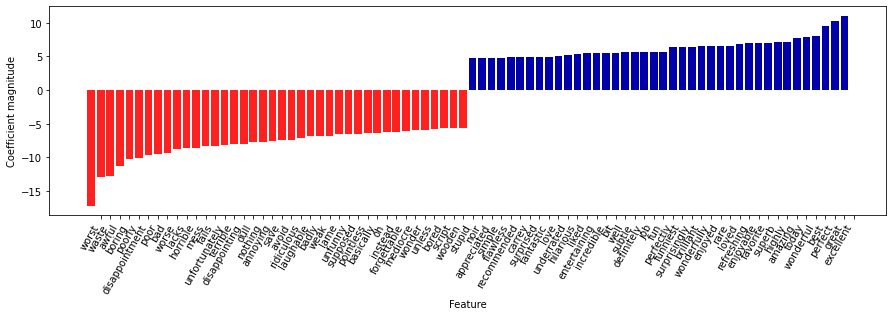

In [41]:
import mglearn

mglearn.tools.visualize_coefficients(
    grid.best_estimator_.named_steps['logisticregression'].coef_[0],
    feature_names, n_top_features=40
)